In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=5.596051169464509 et b_1=5.21689617735917


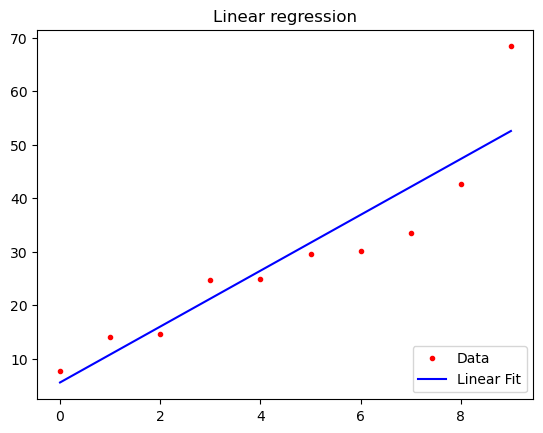

In [2]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 



In [11]:
x1, y1 = generate_data(n_samples=10, outlier=True)
lr1 = LinearRegression()
lr1.fit(x1[:, np.newaxis], y1)
s2_1 = s2(y1, lr1.predict(x1[:, np.newaxis]))
print(s2_1)

36.97242601739404


In [15]:
print('With outliers :')
t=0
while t<5:
    x1, y1 = generate_data(n_samples=10, outlier=True)
    lr1 = LinearRegression()
    lr1.fit(x1[:, np.newaxis], y1)
    s2_1 = s2(y1, lr1.predict(x1[:, np.newaxis]))

    print('b_0='+str(lr1.intercept_)+' et b_1='+str(lr1.coef_[0])+',et s²='+str(s2_1))
    t+=1

print('\nWithout outliers :')
i=0
while i<5:
    x2, y2 = generate_data(n_samples=10, outlier=False)
    lr2 = LinearRegression()
    lr2.fit(x2[:, np.newaxis], y2)
    s2_2 = s2(y2, lr2.predict(x2[:, np.newaxis]))

    print('b_0='+str(lr2.intercept_)+' et b_1='+str(lr2.coef_[0])+' et s²='+str(s2_2))
    i+=1




With outliers :
b_0=5.593525314693146 et b_1=5.135734321738351,et s²=52.75684163453466
b_0=6.74025423552629 et b_1=4.926408853545229,et s²=35.1495341890036
b_0=4.860775365479817 et b_1=5.372813095558265,et s²=22.604172137365204
b_0=2.64552780286758 et b_1=5.503300559174383,et s²=34.81813440570987
b_0=6.463110856993563 et b_1=4.986381978711853,et s²=47.23009905911661

Without outliers :
b_0=13.438455495491553 et b_1=3.7141782877922247 et s²=6.889926839713786
b_0=10.876376850895703 et b_1=3.995449785591603 et s²=4.679082913256232
b_0=11.04895395378351 et b_1=3.8675034338786864 et s²=2.2619510094560127
b_0=5.83019585029524 et b_1=4.816592742144297 et s²=11.043852112232956
b_0=9.579318034127727 et b_1=4.013738725845851 et s²=14.80984070487893


La variance estimée du bruit s² est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introiduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  \hat{y_{(i)j}} est l'estimation de y_j à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des e_{(i)j} est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [29]:
x, y = generate_data(n_samples=10, outlier=True)

#### <span style="color:blue">REPONSE 4.2.a :</span> 


In [30]:
def profil_residuel(x, y, i):
    x_new = np.delete(x, i)
    y_new = np.delete(y, i)

    lr = LinearRegression()
    lr.fit(x_new[:, np.newaxis], y_new)

    e = y_new - lr.predict(x_new[:, np.newaxis])

    return e

print(profil_residuel(x,y,5))

[ 4.02146933  2.09161255  1.09340652  2.63173531 -9.57853824 -5.80175216
 -2.93091304 -5.21060807 13.6835878 ]


e_0=[ 4.21617472  2.88284625  4.08605259 -8.4593434  -2.25110983 -5.35280221
 -2.81708553 -5.431903   13.12717042]
e_1=[ 5.14443493  1.99001323  3.41516257 -8.90829042 -2.47811386 -5.35786324
 -2.60020356 -4.99307804 13.78793838]
e_2=[ 4.62961094  2.6684824   3.14606164 -9.09548367 -2.58339943 -5.38124112
 -2.54167376 -4.85264055 14.01028355]
e_3=[ 4.84797255  2.87593455  1.83554729 -8.92075991 -2.41958513 -5.22833629
 -2.3996784  -4.72155465 14.13045999]
e_4=[ 2.92485466  1.07612412  0.15904434  1.77849938 -3.72616568 -6.41160937
 -3.459644   -5.65821278 13.31710933]
e_5=[ 4.02146933  2.09161255  1.09340652  2.63173531 -9.57853824 -5.80175216
 -2.93091304 -5.21060807 13.6835878 ]
e_6=[ 4.12823816  2.10280472  1.00902205  2.45177419 -9.85407601 -3.40629665
 -3.49318077 -5.86845245 12.93016677]
e_7=[ 4.35609546  2.34972905  1.27501339  2.73683255 -9.54995063 -3.08310425
 -5.92618382 -5.48805899 13.32962724]
e_8=[ 4.82802121  2.64318084  1.38999122  2.67333643 -9.79192071 -3.50354829
 -6

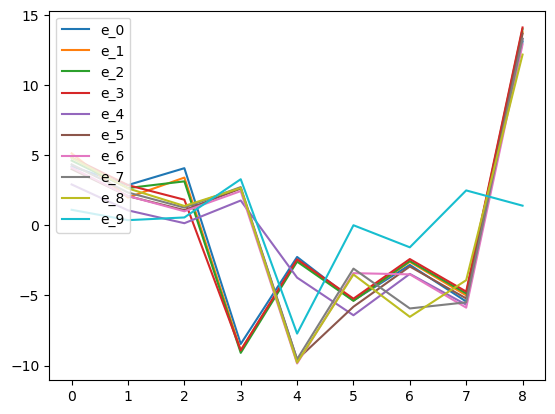

In [31]:
fig = plt.figure()
for i in range(len(x)):
    e = profil_residuel(x, y, i)
    print('e_'+str(i)+'='+str(profil_residuel(x, y, i)))
    plt.plot(e, label='e_'+str(i))
plt.legend(loc='upper left')    
plt.show()


Le profil pour i=9 est différent car e_9 est le seul qui n'a pas la même valeur pour j=9.

#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

In [38]:
def cook(x, y, i):
    e = profil_residuel(x, y, i)

    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)
    y_pred = lr.predict(x[:, np.newaxis])
    denom = 2 * s2(y, y_pred)

    D = np.sum(e**2) / denom
    
    return D

print(cook(x,y,5))

4.403498013884113


#### <span style="color:blue">REPONSE 4.2.c :</span> 


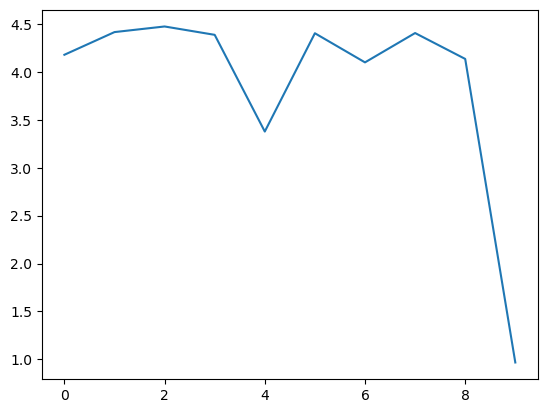

In [39]:
fig = plt.figure()
D = [cook(x, y, i) for i in range(len(x))]
plt.plot(D, label='Cook\'s distance')    
plt.show()

## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$$ 

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [ ]:
from scipy.stats import t


...